In [1]:
pip install pyswarms

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas_ml

    100% |████████████████████████████████| 102kB 317kB/s a 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ml as pdml
from pandas_ml import ConfusionMatrix
import datetime
import imblearn
# Import PySwarms
import pyswarms as ps

In [2]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.drop(['Time','Amount'],axis=1)
X = df.iloc[:,:-1]
y = df['Class']

In [3]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0


In [4]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [5]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076


In [6]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [7]:
y

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
284777    0
284778    0
284779    0
284780    0
284781    0
284782    0
284783    0
284784    0
284785    0
284786    0
284787    0
284788    0
284789    0
284790    0
284791    0
284792    0
284793    0
284794    0
284795    0
284796    0
284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [10]:
data = scale(X)
pca = PCA(n_components=10)
X = pca.fit_transform(data)
print(X)
print(y)
print(type(X))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
df2 = pdml.ModelFrame(X_train, target=y_train)
sampler = df2.imbalance.over_sampling.SMOTE()
oversampled = df2.fit_sample(sampler)
X, y = oversampled.iloc[:,1:11], oversampled['Class']

[[ 0.27521638 -0.39698759  0.54919276 ... -0.2763274   0.00409638
   0.14629198]
 [-0.18395032 -0.03080621  0.67339938 ...  0.23693228  0.37048251
   0.04799704]
 [ 0.00290651 -0.19611935  1.35991597 ...  1.16878826 -0.7062751
  -1.41821503]
 ...
 [ 0.0975757  -0.40067568  1.39783933 ... -1.19729036 -0.54027805
  -0.14433019]
 [-0.20149816 -1.83260521  0.86860787 ... -0.29092864 -0.23408224
  -0.21167015]
 [ 0.54638491  0.475762   -0.05226184 ... -0.42405167 -0.38536626
   0.49605296]]
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
284777    0
284778    0
284779    0
284780    0
284781    0
284782    0
284783    0
284784    0
284785    0
284786    0
284787    0
28478

In [11]:
print(X)
print(type(X))
X=X.as_matrix()
y=y.as_matrix()
print(X)
print(type(X))

                0          1          2          3         4         5  \
0       -0.703786  -0.407643   0.542478  -1.555788  0.659635 -0.840778   
1        0.036767  -0.907796  -0.310281  -0.470397  1.087233 -1.660162   
2       -0.112690  -0.516608  -0.708731  -0.540707  1.621595  0.134828   
3       -1.730726   1.583802   0.217669  -1.039688  0.796320 -0.491073   
4        0.324198   0.168766   0.372426  -0.284945  0.307592 -0.174704   
5        0.437349  -0.238544   0.866371  -0.155005  0.149392  1.033428   
6        0.055277  -0.144918  -1.039832   0.707734 -0.268182  0.053905   
7       -0.515482  -2.310906   1.373074   1.893830  0.426861 -1.616827   
8       -0.489044  -0.527469  -0.120498   0.084337  0.063828 -1.099051   
9        0.095733  -0.012932  -0.456677  -0.302324  0.202410 -0.778393   
10      -1.631803   2.018997  -1.110683  -0.358684  1.345767  0.278583   
11      -1.076530  -1.377607  -0.327328  -0.005050 -2.108991  1.252966   
12      -0.504698   0.045683   3.61095

/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [12]:
def forward_prop(params):
    n_inputs = 10
    n_hidden = 20
    n_classes = 2

    W1 = params[0:200].reshape((n_inputs,n_hidden))
    b1 = params[200:220].reshape((n_hidden,))
    W2 = params[220:260].reshape((n_hidden,n_classes))
    b2 = params[260:262].reshape((n_classes,))

    #print(W1)
    #print(W2)

    z1 = X.dot(W1) + b1  
    a1 = np.tanh(z1)     
    z2 = a1.dot(W2) + b2
    logits = z2          

    
    exp_scores = np.exp(logits)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    
    N = len(X)
    corect_logprobs = -np.log(probs[range(N), y])
    loss = np.sum(corect_logprobs) / N
    return loss

In [13]:
def f(x):
    n_particles = x.shape[0]
    j = [forward_prop(x[i]) for i in range(n_particles)]
    print(datetime.datetime.now().time())
    return np.array(j)

options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

dimensions = 262
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=dimensions, options=options)

cost, pos = optimizer.optimize(f, iters=150, verbose=3)

2021-06-03 10:33:44,751 - pyswarms.single.global_best - INFO - Optimize for 150 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   1%|          |1/150, best_cost=0.562

10:33:54.008451


pyswarms.single.global_best:   1%|▏         |2/150, best_cost=0.562

10:34:02.990831


pyswarms.single.global_best:   2%|▏         |3/150, best_cost=0.562

10:34:11.859440


pyswarms.single.global_best:   3%|▎         |4/150, best_cost=0.534

10:34:21.109454


pyswarms.single.global_best:   3%|▎         |5/150, best_cost=0.534

10:34:30.291414


pyswarms.single.global_best:   4%|▍         |6/150, best_cost=0.453

10:34:39.488186


pyswarms.single.global_best:   5%|▍         |7/150, best_cost=0.373

10:34:48.530196


pyswarms.single.global_best:   5%|▌         |8/150, best_cost=0.373

10:34:57.975155


pyswarms.single.global_best:   6%|▌         |9/150, best_cost=0.348

10:35:07.030795


pyswarms.single.global_best:   7%|▋         |10/150, best_cost=0.327

10:35:15.928630


pyswarms.single.global_best:   7%|▋         |11/150, best_cost=0.304

10:35:24.914253


pyswarms.single.global_best:   8%|▊         |12/150, best_cost=0.263

10:35:33.755192


pyswarms.single.global_best:   9%|▊         |13/150, best_cost=0.263

10:35:42.684940


pyswarms.single.global_best:   9%|▉         |14/150, best_cost=0.253

10:35:51.482832


pyswarms.single.global_best:  10%|█         |15/150, best_cost=0.244

10:36:00.152624


pyswarms.single.global_best:  11%|█         |16/150, best_cost=0.242

10:36:08.743197


pyswarms.single.global_best:  11%|█▏        |17/150, best_cost=0.23 

10:36:17.427384


pyswarms.single.global_best:  12%|█▏        |18/150, best_cost=0.221

10:36:26.035928


pyswarms.single.global_best:  13%|█▎        |19/150, best_cost=0.213

10:36:34.722409


pyswarms.single.global_best:  13%|█▎        |20/150, best_cost=0.213

10:36:43.563763


pyswarms.single.global_best:  14%|█▍        |21/150, best_cost=0.213

10:36:52.343025


pyswarms.single.global_best:  15%|█▍        |22/150, best_cost=0.213

10:37:00.969293


pyswarms.single.global_best:  15%|█▌        |23/150, best_cost=0.209

10:37:09.514401


pyswarms.single.global_best:  16%|█▌        |24/150, best_cost=0.2  

10:37:18.216388


pyswarms.single.global_best:  17%|█▋        |25/150, best_cost=0.2

10:37:26.886655


pyswarms.single.global_best:  17%|█▋        |26/150, best_cost=0.197

10:37:35.616730


pyswarms.single.global_best:  18%|█▊        |27/150, best_cost=0.195

10:37:44.391518


pyswarms.single.global_best:  19%|█▊        |28/150, best_cost=0.192

10:37:53.076365


pyswarms.single.global_best:  19%|█▉        |29/150, best_cost=0.192

10:38:03.145057


pyswarms.single.global_best:  20%|██        |30/150, best_cost=0.192

10:38:12.892979


pyswarms.single.global_best:  21%|██        |31/150, best_cost=0.188

10:38:21.577175


pyswarms.single.global_best:  21%|██▏       |32/150, best_cost=0.188

10:38:30.355535


pyswarms.single.global_best:  22%|██▏       |33/150, best_cost=0.185

10:38:39.155588


pyswarms.single.global_best:  23%|██▎       |34/150, best_cost=0.185

10:38:47.931027


pyswarms.single.global_best:  23%|██▎       |35/150, best_cost=0.185

10:38:56.530753


pyswarms.single.global_best:  24%|██▍       |36/150, best_cost=0.185

10:39:05.180669


pyswarms.single.global_best:  25%|██▍       |37/150, best_cost=0.183

10:39:13.955651


pyswarms.single.global_best:  25%|██▌       |38/150, best_cost=0.183

10:39:23.003741


pyswarms.single.global_best:  26%|██▌       |39/150, best_cost=0.181

10:39:31.792572


pyswarms.single.global_best:  27%|██▋       |40/150, best_cost=0.181

10:39:40.517780


pyswarms.single.global_best:  27%|██▋       |41/150, best_cost=0.181

10:39:49.745014


pyswarms.single.global_best:  28%|██▊       |42/150, best_cost=0.18 

10:40:00.491438


pyswarms.single.global_best:  29%|██▊       |43/150, best_cost=0.18

10:40:09.333753


pyswarms.single.global_best:  29%|██▉       |44/150, best_cost=0.18

10:40:17.886856


pyswarms.single.global_best:  30%|███       |45/150, best_cost=0.179

10:40:26.788219


pyswarms.single.global_best:  31%|███       |46/150, best_cost=0.179

10:40:35.588389


pyswarms.single.global_best:  31%|███▏      |47/150, best_cost=0.178

10:40:44.557781


pyswarms.single.global_best:  32%|███▏      |48/150, best_cost=0.177

10:40:53.248852


pyswarms.single.global_best:  33%|███▎      |49/150, best_cost=0.176

10:41:02.110729


pyswarms.single.global_best:  33%|███▎      |50/150, best_cost=0.176

10:41:10.872295


pyswarms.single.global_best:  34%|███▍      |51/150, best_cost=0.176

10:41:19.682809


pyswarms.single.global_best:  35%|███▍      |52/150, best_cost=0.176

10:41:28.992107


pyswarms.single.global_best:  35%|███▌      |53/150, best_cost=0.176

10:41:37.782857


pyswarms.single.global_best:  36%|███▌      |54/150, best_cost=0.175

10:41:46.499057


pyswarms.single.global_best:  37%|███▋      |55/150, best_cost=0.175

10:41:54.912595


pyswarms.single.global_best:  37%|███▋      |56/150, best_cost=0.175

10:42:04.104221


pyswarms.single.global_best:  38%|███▊      |57/150, best_cost=0.174

10:42:13.256221


pyswarms.single.global_best:  39%|███▊      |58/150, best_cost=0.174

10:42:22.386331


pyswarms.single.global_best:  39%|███▉      |59/150, best_cost=0.174

10:42:31.240363


pyswarms.single.global_best:  40%|████      |60/150, best_cost=0.174

10:42:40.376400


pyswarms.single.global_best:  41%|████      |61/150, best_cost=0.174

10:42:49.342429


pyswarms.single.global_best:  41%|████▏     |62/150, best_cost=0.173

10:42:58.215809


pyswarms.single.global_best:  42%|████▏     |63/150, best_cost=0.173

10:43:07.089652


pyswarms.single.global_best:  43%|████▎     |64/150, best_cost=0.172

10:43:15.988985


pyswarms.single.global_best:  43%|████▎     |65/150, best_cost=0.172

10:43:24.970806


pyswarms.single.global_best:  44%|████▍     |66/150, best_cost=0.172

10:43:33.841421


pyswarms.single.global_best:  45%|████▍     |67/150, best_cost=0.171

10:43:42.817800


pyswarms.single.global_best:  45%|████▌     |68/150, best_cost=0.171

10:43:51.699750


pyswarms.single.global_best:  46%|████▌     |69/150, best_cost=0.17 

10:44:00.559147


pyswarms.single.global_best:  47%|████▋     |70/150, best_cost=0.17

10:44:09.406491


pyswarms.single.global_best:  47%|████▋     |71/150, best_cost=0.169

10:44:18.497047


pyswarms.single.global_best:  48%|████▊     |72/150, best_cost=0.168

10:44:27.438358


pyswarms.single.global_best:  49%|████▊     |73/150, best_cost=0.168

10:44:36.387343


pyswarms.single.global_best:  49%|████▉     |74/150, best_cost=0.168

10:44:45.567951


pyswarms.single.global_best:  50%|█████     |75/150, best_cost=0.167

10:44:54.636855


pyswarms.single.global_best:  51%|█████     |76/150, best_cost=0.167

10:45:03.857045


pyswarms.single.global_best:  51%|█████▏    |77/150, best_cost=0.166

10:45:13.038255


pyswarms.single.global_best:  52%|█████▏    |78/150, best_cost=0.166

10:45:21.972210


pyswarms.single.global_best:  53%|█████▎    |79/150, best_cost=0.166

10:45:31.229113


pyswarms.single.global_best:  53%|█████▎    |80/150, best_cost=0.165

10:45:40.476830


pyswarms.single.global_best:  54%|█████▍    |81/150, best_cost=0.165

10:45:49.470272


pyswarms.single.global_best:  55%|█████▍    |82/150, best_cost=0.164

10:45:58.413840


pyswarms.single.global_best:  55%|█████▌    |83/150, best_cost=0.164

10:46:07.439851


pyswarms.single.global_best:  56%|█████▌    |84/150, best_cost=0.163

10:46:16.453687


pyswarms.single.global_best:  57%|█████▋    |85/150, best_cost=0.163

10:46:25.546245


pyswarms.single.global_best:  57%|█████▋    |86/150, best_cost=0.163

10:46:34.633528


pyswarms.single.global_best:  58%|█████▊    |87/150, best_cost=0.162

10:46:43.781949


pyswarms.single.global_best:  59%|█████▊    |88/150, best_cost=0.162

10:46:52.808978


pyswarms.single.global_best:  59%|█████▉    |89/150, best_cost=0.162

10:47:01.799461


pyswarms.single.global_best:  60%|██████    |90/150, best_cost=0.161

10:47:10.783891


pyswarms.single.global_best:  61%|██████    |91/150, best_cost=0.161

10:47:20.002338


pyswarms.single.global_best:  61%|██████▏   |92/150, best_cost=0.161

10:47:29.067916


pyswarms.single.global_best:  62%|██████▏   |93/150, best_cost=0.161

10:47:38.168598


pyswarms.single.global_best:  63%|██████▎   |94/150, best_cost=0.16 

10:47:47.251039


pyswarms.single.global_best:  63%|██████▎   |95/150, best_cost=0.16

10:47:56.335289


pyswarms.single.global_best:  64%|██████▍   |96/150, best_cost=0.16

10:48:05.291491


pyswarms.single.global_best:  65%|██████▍   |97/150, best_cost=0.16

10:48:14.332102


pyswarms.single.global_best:  65%|██████▌   |98/150, best_cost=0.159

10:48:26.313887


pyswarms.single.global_best:  66%|██████▌   |99/150, best_cost=0.159

10:48:35.775223


pyswarms.single.global_best:  67%|██████▋   |100/150, best_cost=0.159

10:48:44.898179


pyswarms.single.global_best:  67%|██████▋   |101/150, best_cost=0.159

10:48:53.922882


pyswarms.single.global_best:  68%|██████▊   |102/150, best_cost=0.159

10:49:03.270304


pyswarms.single.global_best:  69%|██████▊   |103/150, best_cost=0.159

10:49:12.934520


pyswarms.single.global_best:  69%|██████▉   |104/150, best_cost=0.159

10:49:21.916130


pyswarms.single.global_best:  70%|███████   |105/150, best_cost=0.158

10:49:30.885651


pyswarms.single.global_best:  71%|███████   |106/150, best_cost=0.158

10:49:40.450290


pyswarms.single.global_best:  71%|███████▏  |107/150, best_cost=0.158

10:49:50.406035


pyswarms.single.global_best:  72%|███████▏  |108/150, best_cost=0.158

10:50:00.552522


pyswarms.single.global_best:  73%|███████▎  |109/150, best_cost=0.157

10:50:10.962965


pyswarms.single.global_best:  73%|███████▎  |110/150, best_cost=0.157

10:50:20.581584


pyswarms.single.global_best:  74%|███████▍  |111/150, best_cost=0.157

10:50:31.653518


pyswarms.single.global_best:  75%|███████▍  |112/150, best_cost=0.157

10:50:41.244480


pyswarms.single.global_best:  75%|███████▌  |113/150, best_cost=0.156

10:50:50.314632


pyswarms.single.global_best:  76%|███████▌  |114/150, best_cost=0.156

10:50:59.482942


pyswarms.single.global_best:  77%|███████▋  |115/150, best_cost=0.156

10:51:08.736034


pyswarms.single.global_best:  77%|███████▋  |116/150, best_cost=0.156

10:51:17.860756


pyswarms.single.global_best:  78%|███████▊  |117/150, best_cost=0.155

10:51:27.234817


pyswarms.single.global_best:  79%|███████▊  |118/150, best_cost=0.155

10:51:36.548133


pyswarms.single.global_best:  79%|███████▉  |119/150, best_cost=0.155

10:51:45.793537


pyswarms.single.global_best:  80%|████████  |120/150, best_cost=0.155

10:51:55.150550


pyswarms.single.global_best:  81%|████████  |121/150, best_cost=0.155

10:52:04.415521


pyswarms.single.global_best:  81%|████████▏ |122/150, best_cost=0.154

10:52:13.830413


pyswarms.single.global_best:  82%|████████▏ |123/150, best_cost=0.154

10:52:23.186303


pyswarms.single.global_best:  83%|████████▎ |124/150, best_cost=0.154

10:52:32.394321


pyswarms.single.global_best:  83%|████████▎ |125/150, best_cost=0.154

10:52:41.910050


pyswarms.single.global_best:  84%|████████▍ |126/150, best_cost=0.153

10:52:51.100581


pyswarms.single.global_best:  85%|████████▍ |127/150, best_cost=0.153

10:53:00.176791


pyswarms.single.global_best:  85%|████████▌ |128/150, best_cost=0.153

10:53:09.167984


pyswarms.single.global_best:  86%|████████▌ |129/150, best_cost=0.153

10:53:18.192372


pyswarms.single.global_best:  87%|████████▋ |130/150, best_cost=0.152

10:53:27.248891


pyswarms.single.global_best:  87%|████████▋ |131/150, best_cost=0.152

10:53:36.417091


pyswarms.single.global_best:  88%|████████▊ |132/150, best_cost=0.152

10:53:45.687802


pyswarms.single.global_best:  89%|████████▊ |133/150, best_cost=0.152

10:53:54.587502


pyswarms.single.global_best:  89%|████████▉ |134/150, best_cost=0.152

10:54:02.667908


pyswarms.single.global_best:  90%|█████████ |135/150, best_cost=0.151

10:54:10.561732


pyswarms.single.global_best:  91%|█████████ |136/150, best_cost=0.151

10:54:18.712483


pyswarms.single.global_best:  91%|█████████▏|137/150, best_cost=0.151

10:54:26.607522


pyswarms.single.global_best:  92%|█████████▏|138/150, best_cost=0.151

10:54:34.774130


pyswarms.single.global_best:  93%|█████████▎|139/150, best_cost=0.151

10:54:42.945384


pyswarms.single.global_best:  93%|█████████▎|140/150, best_cost=0.15 

10:54:51.084600


pyswarms.single.global_best:  94%|█████████▍|141/150, best_cost=0.15

10:54:59.351300


pyswarms.single.global_best:  95%|█████████▍|142/150, best_cost=0.15

10:55:07.352196


pyswarms.single.global_best:  95%|█████████▌|143/150, best_cost=0.15

10:55:15.545792


pyswarms.single.global_best:  96%|█████████▌|144/150, best_cost=0.15

10:55:23.681834


pyswarms.single.global_best:  97%|█████████▋|145/150, best_cost=0.15

10:55:31.694333


pyswarms.single.global_best:  97%|█████████▋|146/150, best_cost=0.15

10:55:39.874470


pyswarms.single.global_best:  98%|█████████▊|147/150, best_cost=0.15

10:55:47.833917


pyswarms.single.global_best:  99%|█████████▊|148/150, best_cost=0.149

10:55:57.320973


pyswarms.single.global_best:  99%|█████████▉|149/150, best_cost=0.149

10:56:10.555163


pyswarms.single.global_best: 100%|██████████|150/150, best_cost=0.149
2021-06-03 10:56:19,970 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.1491380008046132, best pos: [ 0.7728372   0.6668175   1.42195686 -0.17950388  0.96004353  0.04427273
 -0.98658678  0.0569024   0.61692163  0.70618485  1.05894514  1.13934156
  0.38011545 -0.27422758 -0.27561171  0.96773316  0.70393285 -1.09932006
  0.01175288  0.31470899  0.00551762  0.45799578  0.59222261 -0.72806176
  1.25986842  0.44982341  1.15484734  0.50243328  0.33336085  1.22492459
  0.70229788  0.18211561 -0.69023281  0.92209305 -0.65597546  0.64368085
  0.59987489  0.52816614  0.94229512  0.06615761  1.18288676  0.81597236
  0.70493371  1.39753707  1.44625366  0.39405672  0.661914   -1.13790301
  0.91332064  0.58955749 -1.58519107 -0.16324987  0.98988615  0.93148286
 -0.38027219 -0.22078816  1.51023421  0.38501598  0.49599435  0.57636257
 -0.50278107  0.30653975 -0.12740538 -0.19136702  0.38580568  0.65868119

10:56:19.961330


In [14]:
pos

array([ 0.7728372 ,  0.6668175 ,  1.42195686, -0.17950388,  0.96004353,
        0.04427273, -0.98658678,  0.0569024 ,  0.61692163,  0.70618485,
        1.05894514,  1.13934156,  0.38011545, -0.27422758, -0.27561171,
        0.96773316,  0.70393285, -1.09932006,  0.01175288,  0.31470899,
        0.00551762,  0.45799578,  0.59222261, -0.72806176,  1.25986842,
        0.44982341,  1.15484734,  0.50243328,  0.33336085,  1.22492459,
        0.70229788,  0.18211561, -0.69023281,  0.92209305, -0.65597546,
        0.64368085,  0.59987489,  0.52816614,  0.94229512,  0.06615761,
        1.18288676,  0.81597236,  0.70493371,  1.39753707,  1.44625366,
        0.39405672,  0.661914  , -1.13790301,  0.91332064,  0.58955749,
       -1.58519107, -0.16324987,  0.98988615,  0.93148286, -0.38027219,
       -0.22078816,  1.51023421,  0.38501598,  0.49599435,  0.57636257,
       -0.50278107,  0.30653975, -0.12740538, -0.19136702,  0.38580568,
        0.65868119,  0.40391409,  1.14317745,  1.14694547,  0.58

In [15]:
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

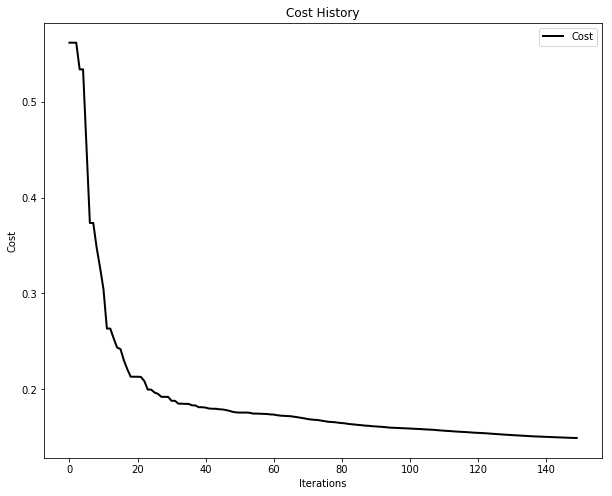

In [16]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

In [17]:
def predict(X, pos):
    """
    Use the trained weights to perform class predictions.

    Inputs
    ------
    X: numpy.ndarray
        Input Iris dataset
    pos: numpy.ndarray
        Position matrix found by the swarm. Will be rolled
        into weights and biases.
    """
    # Neural network architecture
    n_inputs = 10
    n_hidden = 20
    n_classes = 2

    # Roll-back the weights and biases
    W1 = pos[0:200].reshape((n_inputs,n_hidden))
    b1 = pos[200:220].reshape((n_hidden,))
    W2 = pos[220:260].reshape((n_hidden,n_classes))
    b2 = pos[260:262].reshape((n_classes,))

    # Perform forward propagation
    z1 = X.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = np.tanh(z1)     # Activation in Layer 1
    z2 = a1.dot(W2) + b2 # Pre-activation in Layer 2
    logits = z2          # Logits for Layer 2

    y_pred = np.argmax(logits, axis=1)
    return y_pred

In [18]:
(predict(X,pos) == y).mean()


0.9455985342447055